<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0603_clustering_for_image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image segmentation

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from sklearn.cluster import KMeans

In [26]:
!curl -O https://raw.githubusercontent.com/lmcanavals/machine_learning/main/clonewars.webp

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  603k  100  603k    0     0  1142k      0 --:--:-- --:--:-- --:--:-- 1142k


In [27]:
image = np.asarray(PIL.Image.open('clonewars.webp'))
image.shape

(1500, 2250, 3)

In [28]:
image[0,0,:]

array([125,  86,  60], dtype=uint8)

In [29]:
X = image.reshape(-1, 3)
X.shape

(3375000, 3)

In [30]:
X[0]

array([125,  86,  60], dtype=uint8)

In [31]:
kmeans = KMeans(n_clusters=8, random_state=42, n_init='auto').fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [32]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans=KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape).astype(int))

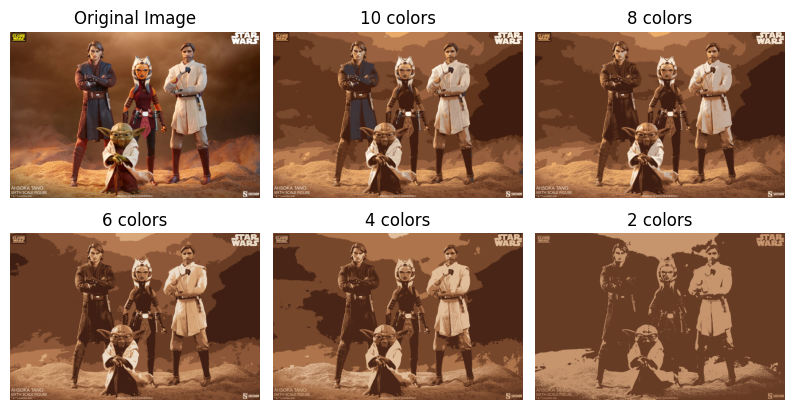

In [33]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)
plt.subplot(231)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()